1\. Write a function that converts number representation (bin<->dec<->hex)

In [10]:
def convert(x,b1,b2):
    
    for i in range(len(x)):       # ho tentato di utilizzare l'istruzione match/case, ma l'interprete non la riconosce
        if x[i]=="a":
            x[i]=10
        if x[i]=="b":
            x[i]=11
        if x[i]=="c":
            x[i]=12
        if x[i]=="d":
            x[i]=13
        if x[i]=="e":
            x[i]=14
        if x[i]=="f":
            x[i]=15
    x=list(map(int,x))
    
    x10=0
    for i in range(len(x)):            # conversione in base 10
        x10+=x[i]*b1**(len(x)-i-1)

    result=[]
    x10_copy=x10
    if b2==10:                         # ritorno il numero in base 10 se è quello desiderato
        return x10
    while x10_copy!=0:                    # altrimenti procedo con la conversione in un'altra base
        result.append(x10_copy%b2)
        x10_copy//=b2
    
    for i in range(len(result)):       # sostituisco i caratteri aggiuntivi del sistema esadecimale
        if result[i]==10:
            result[i]="a"
        if result[i]==11:
            result[i]="b"
        if result[i]==12:
            result[i]="c"
        if result[i]==13:
            result[i]="d"
        if result[i]==14:
            result[i]="e"
        if result[i]==15:
            result[i]="f"
                            
    result.reverse()
    return("".join([str(z) for z in result]))

number=list(input("Inserire numero\t"))
b1=int(input("Inserire base utilizzata\t"))
b2=int(input("Inserire base desiderata\t"))
print("Numero ","".join([str(z) for z in number])," in base ",b2,":\t",convert(number,b1,b2))

Inserire numero	1f
Inserire base utilizzata	16
Inserire base desiderata	10
Numero  1f  in base  10 :	 31


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [19]:
#nfpt=list('11000000101100000000000000000000')    # numeri presi dagli esempi della lezione
nfpt=list('00000011111000000000000000000000')
nfp=list(map(int,nfpt))
print(len(nfp))

def convert_floating_point(x):
    s=nfp[0]
    exp=nfp[1:9]
    man=nfp[9:]
    man10=1
    exp10=convert(exp,2,10)-127              # sfrutto la funzione definita nell'esercizio precedente per calcolare l'esponente
    for i in range(len(man)):                # itero sulla mantissa per calcolarne il valore
        man10+=man[i]*2**(-i-1)
    number=man10*2**exp10                    # compongo il numero in base decimale
    if s==1:                                 # aggiungo il segno
        number=-number
    return number

print("Numero in base 10:\t",convert_floating_point(nfp))

32
Numero in base 10:	 1.316553672920962e-36


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [27]:
import sys
under, over = float(1), float(1)
N=0
while over<=sys.float_info.max/2 and under>=sys.float_info.min*2:  #l'informazione sui veri under- e over-flow serve solo per sapere quando fermarsi
    under/=2                                                         # tali valori vengono poi stimati senza far uso del pacchetto sys
    over*=2
    N+=1
    
print(f"Ciclo fermato dopo {N} iterazioni")
print(f"Overflow:\t %1.3e" % over)
print(f"Underflow:\t %1.3e" % under)

print("\nValori determinati con sys:")
print(f"Overflow:\t %1.3e" % sys.float_info.max)
print(f"Underflow:\t %1.3e" % sys.float_info.min)

Ciclo fermato dopo 1022 interazioni
Overflow:	 4.494e+307
Underflow:	 2.225e-308

Valori determinati con sys:
Overflow:	 1.798e+308
Underflow:	 2.225e-308


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [11]:
a=1
b=10                                           # solo per entrare nel ciclo
N=0
while a != b:
    b=1+2**(-N)                                # assegno diversi valori a b
    N+=1

print(f"Ciclo fermato dopo {N} iterazioni")
print("Machine precision:\t%.3e" % 2**(2-N))   # 2-N perchéN esce già dal ciclo col valore che avrebbe nell'iterazione successiva, inoltre quando il ciclo si interrompe è perche 2**(-N) ha già passato la precisione pacchina di 2^(-1)

Ciclo fermato dopo 54 iterazioni
Machine precision:	2.220e-16


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [2]:
import numpy as np
def solquadform(a,b,c):
    return [(-b+np.sqrt(b**2-4*a*c))/(2*a),(-b-np.sqrt(b**2-4*a*c))/(2*a)]

sol1=solquadform(0.001,1000,0.001)
print(f"(a): Solutions: {sol1[0]}, {sol1[1]}")

def solquadform2(a,b,c):
    return [2*c/(-b-np.sqrt(b**2-4*a*c)),2*c/(-b+np.sqrt(b**2-4*a*c))]

sol2=solquadform2(0.001,1000,0.001)
print(f"(b): Solutions: {sol2[0]}, {sol2[1]}")

def solquadform_exact(a,b,c):
    return [-b/(2*a)+np.sqrt((b/(2*a))**2-c/a),-b/(2*a)-np.sqrt((b/(2*a))**2-c/a)]

sol3=solquadform_exact(0.001,1000,0.001)
print(f"(c): Solutions: {sol3[0]}, {sol3[1]}")

# non ho tagliato le cifre decimali per non introdurre approssimazioni nella visualizzazione dei valori

(a): Solutions: -9.999894245993346e-07, -999999.999999
(b): Solutions: -1.000000000001e-06, -1000010.5755125057
(c): Solutions: -1.00000761449337e-06, -999999.999999


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

(a): delta=1e-2,   df/dx =  1.010000000000001
Manually calculated derivative =  1
[1.01       1.0001     1.000001   1.         1.00000008 1.0000889
 0.99920072]


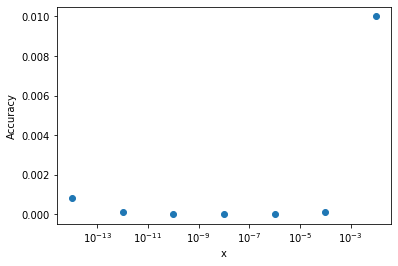

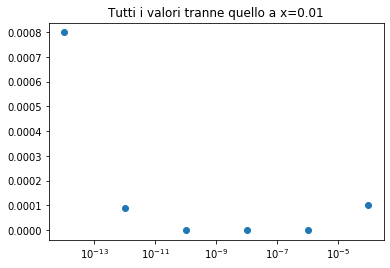

In [3]:
import matplotlib.pyplot as plt
def f(x):
    return x*(x-1)
def df(x,d):
    return (f(x+d)-f(x))/d
print("(a): delta=1e-2,   df/dx = ",df(1,1e-2))
print("Manually calculated derivative = ",2*1-1)

delta=[1e-2,1e-4,1e-6,1e-8,1e-10,1e-12,1e-14]
df_list=np.array([df(1,d) for d in delta])
print(df_list)

accuracy=np.abs(1-df_list)
plt.plot(delta,accuracy,'o')
plt.xscale('log')
plt.xlabel("x")
plt.ylabel("Accuracy")
plt.show()
plt.plot(delta[1:len(delta)],accuracy[1:len(delta)],'o')
plt.xscale('log')
plt.title("Tutti i valori tranne quello a x=0.01")
plt.show()

The code works exactly in the way I expect it to do. Accuracy correctly seems to decrease with lower delta_x, but when delta_x is too smaller I obtain inconsistent results due to the substraction f(x+delta_x)-f(x) caused by the finite precision of numbers encoded in the computer.

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [5]:
import numpy as np
import time
# a)
N=100
y=np.array(list(map(lambda z:np.sqrt(1-z**2),np.linspace(-1,1,N))))
I=np.sum(2/N*y)
print("Risultato con N=100:  I = %.7f" % I)        # il risultato ci si avvicina ma non è perfetto, servirebbe aumentare il valore di N

# b)
N=200000                   # posso aumentare N fino a valori di 2e5
time1=time.time()
y=np.array(list(map(lambda z:np.sqrt(1-z**2),np.linspace(-1,1,N))))
I2=np.sum(2/N*y)
time2=time.time()
print("Execution time: %.5f" %(time2-time1))
print("Risultato computazione 1 secondo:  I = %.7f" % I2)

N=13000000
time3=time.time()
y=np.array(list(map(lambda z:np.sqrt(1-z**2),np.linspace(-1,1,N))))
I3=np.sum(2/N*y)
time4=time.time()
print("Execution time: %.5f" %(time4-time3))
print("Risultato computazione un minuto:  I = %.7f" % I3)

print("Gain I_1minute-I_1second : %.3e" %(I3-I2))


Risultato con N=100:  I = 1.5534179
Execution time: 0.96152
Risultato computazione 1 secondo:  I = 1.5707885
Execution time: 61.19946
Risultato computazione un minuto:  I = 1.5707962
Gain I_1minute-I_1second : 7.752e-06
